# Probability Density Estimation

## Probability Density

A random variable $x$ has a probability distribution $p(x)$.

The relationship between the outcomes of a random variable and its probability is referred to as the probability density, or simply the "density".

通常情况下我们无法知道整体的随机变量的概率分布, 所以需要通过样本数据来推断或估算出整体的随机变量的概率分布, 这个过程被称为"概率密度估计".

## Summarize Density With a Histogram

在进行概率密度预估时的第一步是通过可以观察到的随机变量样本创建一个柱状图.

柱状图的 x 轴代表分箱, y 轴表示分箱的频率(计数值).

选择分箱的大小很关键, 因为它影响柱状图的精细程度.

比如: 观察值在 1 到 100 之间, 可以将他们分成 3 个箱, 但明显这样的分箱结果太粗糙, 所以分成 10 个箱可能会更好的捕捉概率密度.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

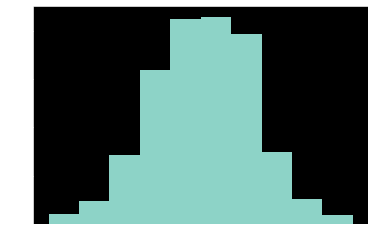

In [15]:
# generate a sample of normal distribute
# mu=0 derivation=1
sample = np.random.normal(size=1000)
# plot a histogram of the sample
plt.hist(sample, bins=10)
plt.show()

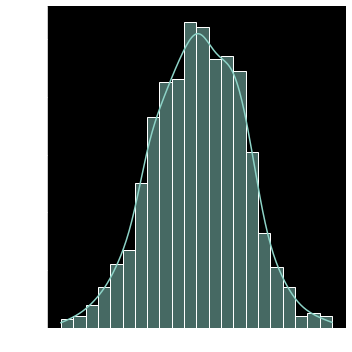

In [24]:
sns.displot(data=sample, kde=True)

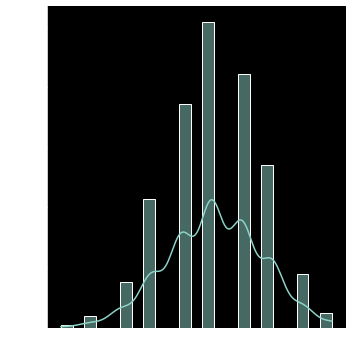

In [33]:
# binomial distribution
# n=10 p=0.5
sample = np.random.binomial(10, 0.5, 1000)
sns.displot(sample, kde=True)

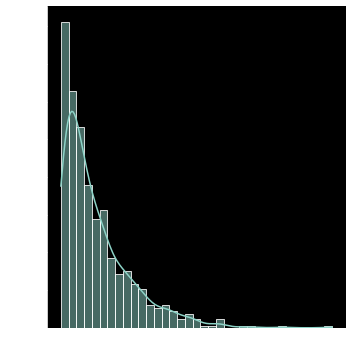

In [36]:
# exponential distribution
# rate=0.25
sample = np.random.exponential((1/0.25), 1000)
sns.displot(sample, kde=True)

## Parametric Density Estimation

大部分随机样本的柱状图都能匹配到已知的概率分布.

一旦我们识别了概率分布, 我们就可以通过样本数据来估算概率分布的参数了.

比如: 正态分布的参数有两个, 一个是均值, 一个是标准差. 我们可以用观察到的数据, 也就是样本数据来估算这两个参数.

估算参数的过程称之为: 参数密度估计.

我们用一个例子说明这个过程.

我们选取一个均值为 50, 标准差为 5 的正态分布随机变量, 从中生成一个含有 1000 个观察对象的样本.

In [37]:
# generate a sample
mu = 50
std = 5
sample = np.random.normal(loc=mu, scale=std, size=1000)

 我们假装并不知道上面的随机样本中的观察对象是正态分布的, 而是通过柱状图猜测它是正态分布的, 接着我们可以估算正态分布的参数, 即均值和标准差.

 我们不应该期望通过样本计算出的均值和标准差正好是 50 和 5, 因为样本的数量和噪音值都会对估算结果产生影响.

In [43]:
# calculate parameters
sample_mean = np.mean(sample)
sample_std = np.std(sample)
print(f'Mean={sample_mean:.3f}, Standard Deviation={sample_std:.3f}')

Mean=49.776, Standard Deviation=5.110


 然后用这些参数拟合分布, 即我们的数据样本的参数密度估计.

 在这个情况下, 我们可以使用 norm() SciPy 函数

In [46]:
import scipy as spy

In [47]:
# define the distribution
dist = spy.stats.norm(sample_mean, sample_std)

然后我们可以在定义域内从这个分布中选取一个范围的概率. 在这个例子中是 30 到 70.

In [50]:
# sample probabilities for a range of outcomes
values = [value for value in range(30, 70)]
probabilities = [dist.pdf(value) for value in values]

最后, 我们可以画出数据样本的直方图, 并覆盖从 PDF 中计算的值范围的概率的线状图.

重要的是, 我们可以将直方图中的每个 bin 中的计数或频率转换为一种归一化概率, 以确保直方图的 y 轴与线图的 y 轴匹配. 这可以通过在调用 hist() 时将密度参数设置为 True 来实现.

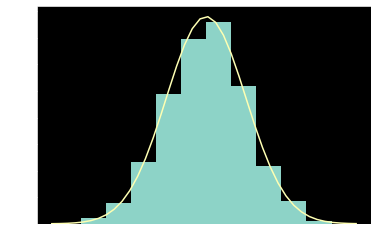

In [52]:
# plot the histogram and pdf
plt.hist(sample, bins=10, density=True)
plt.plot(values, probabilities)

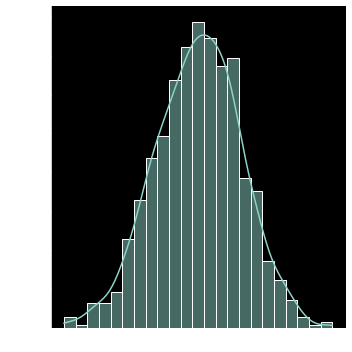

In [64]:
# implemented using seaborn
sns.displot(sample, kind='hist', kde=True, stat='density')

## Nonparametric Density Estimation

continue...

## References

- [A Gentle Introduction to Probability Density Estimation](https://machinelearningmastery.com/probability-density-estimation/#:~:text=Probability%20density%20is%20the%20relationship,have%20a%20high%20probability%20density.)